In [1]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

import seaborn as sns
import os
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

from ydata_profiling import ProfileReport
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
df = pd.read_csv('../data/cleaned_sales_data.csv')

In [3]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Zip Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Revenue
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37
5,6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86
6,7,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.28
7,8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.15
8,9,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50
9,10,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.90


In [4]:
df['Sales Revenue'].describe()

count     9800.000000
mean       230.769036
std        626.651878
min          0.440000
25%         17.250000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales Revenue, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Zip Code       9800 non-null   int64  
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales Revenue  9800 non-null   float64
dtypes: float64(1), int64(2), object(14)
memory usage: 1.

In [6]:
# Convert Order Date & Ship Date to Datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%Y-%m-%d')

## We have a very rich data set of 9800 observations that will allow us to uncover many insights into our business and our customers. We will be focusing on:

1. **Sales Trends and Patterns**
    - **Time Series Analysis:** Plot Sales Revenue over time to identify trends and seasonal patterns.  
    - **Growth Rate Analysis:** Calculate and plot the growth rate of sales over different periods.<br><br>

2. **Customer Analysis**
    - **Customer Segmentation:** Analyze sales by different segments to understand which segments contribute the most to revenue. 
    - **Top Customers:** Identify and analyze the top customers by revenue, orders, and RFM.<br><br>

3. **Geographical Analysis**
    - **Regional Sales Performance:** Analyze sales by different regions, states, and cities to identify high and low-performing areas.<br><br>

4. **Product Analysis**
    - **Top Products and Categories:** Identify the top-selling products, categories, and sub-categories.<br><br>

5. **Revenue Analysis**
    - **Sales Distribution:** Investigate the distribution of sales revenue to see if it follows a particular distribution.
    - **Outlier Detection:** Identify any anomalies or outliers in sales data that may need further investigation.

------------------------------------------------------------------------------------------------------------------

# 1. Sales Trends and Patterns
    - Time Series Analysis: Plot Sales Revenue over time to identify trends and seasonal patterns.  
    - Growth Rate: Calculate and plot the growth rate of sales over different periods.

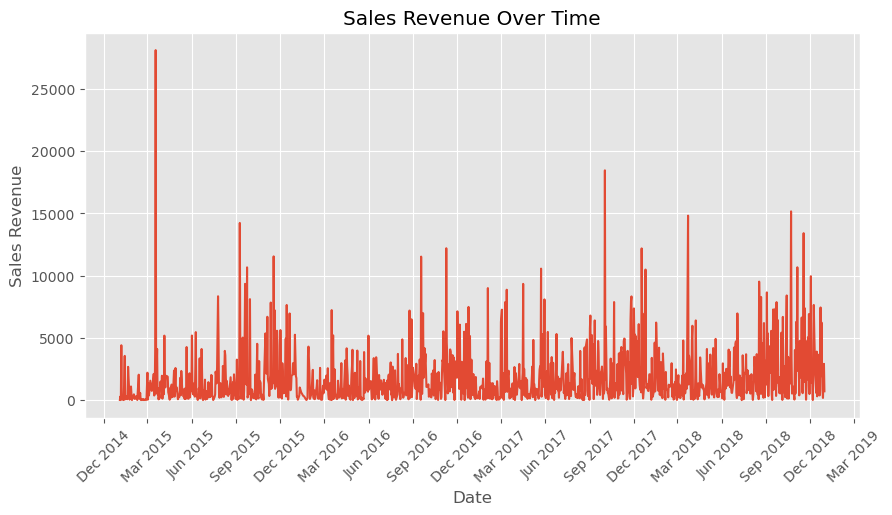

In [7]:
# Lineplot of Daily Sales Revenue Over Time
plt.figure(figsize=(10,5))
daily_sales_over_time = sns.lineplot(x= 'Order Date', y='Sales Revenue',
                               data=df.groupby('Order Date').agg({'Sales Revenue': 'sum'}).reset_index())
daily_sales_over_time = plt.xlabel('Date')
daily_sales_over_time = plt.ylabel('Sales Revenue')
daily_sales_over_time = plt.title('Sales Revenue Over Time')
daily_sales_over_time = plt.xticks(rotation=45)
# Set the x-axis ticks to show every 3 months
daily_sales_over_time = plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
daily_sales_over_time = plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

### As we saw when we cleaned the data, looking at the granular level of daily sales isn't that useful as we have 5 years of sales data and the plot is too clutterd to draw any real insights.

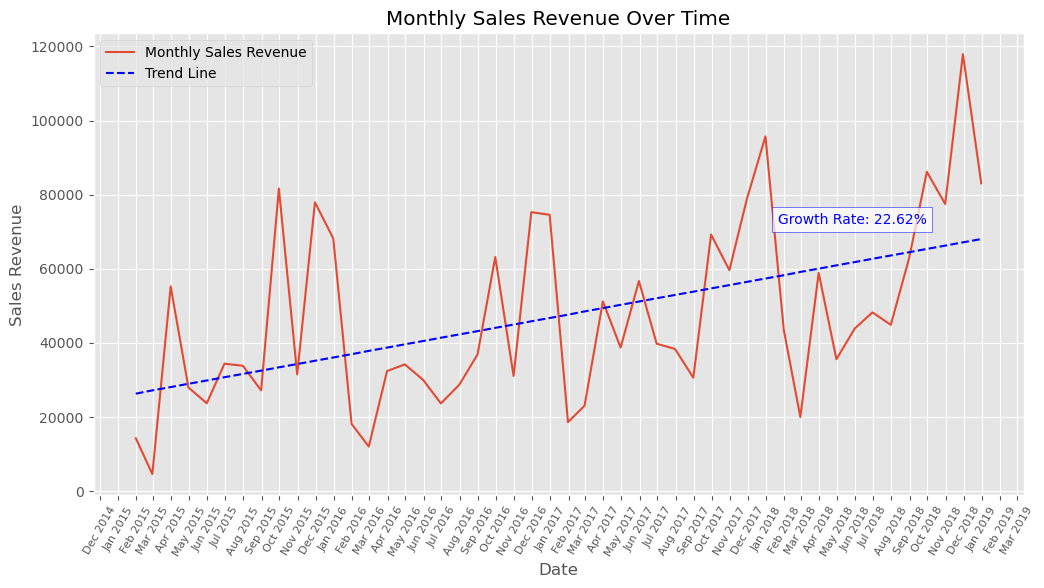

In [8]:
# Aggregate data by month for the entire period
df_monthly = df.groupby(pd.Grouper(key='Order Date', freq='M')).agg({'Sales Revenue': 'sum'}).reset_index()

# Prepare data for trend line & fit linear regression model
X = np.arange(len(df_monthly)).reshape(-1, 1)  # Reshape for sklearn
y = df_monthly['Sales Revenue'].values
lr_model = LinearRegression()
lr_model.fit(X, y)
trend_line = lr_model.predict(X)

# Plot Sales Revenue Over Time & trend line
monthly_sales_over_time = plt.figure(figsize=(12, 6))
monthly_sales_over_time =sns.lineplot(x='Order Date',
                                      y='Sales Revenue',
                                      data=df_monthly,
                                      label='Monthly Sales Revenue')
monthly_sales_over_time = plt.plot(df_monthly['Order Date'],
                                   trend_line,
                                   color='blue',
                                   linestyle='--',
                                   label='Trend Line')

# Calculate growth rate from the trend line
slope = lr_model.coef_[0]  # Slope of the trend line
start_date = df_monthly['Order Date'].min()
end_date = df_monthly['Order Date'].max()
time_period = (end_date - start_date).days / 365  # Convert days to years
growth_rate = (slope * 12) / df_monthly['Sales Revenue'].mean() * 100  # Annual growth rate in percentage

# Add growth rate label on the trend line
monthly_sales_over_time = plt.text(x=df_monthly['Order Date'].iloc[-1] - pd.DateOffset(months=3),  # Adjust x-coordinate
         y=trend_line[-1] * 1.05,  # Adjust y-coordinate
         s=f'Growth Rate: {growth_rate:.2f}%',
         color='blue',
         ha='right',  # Horizontal alignment
         va='bottom',  # Vertical alignment
         fontsize=10,  # Font size
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='blue'))  # Background color and border

# Formatting
monthly_sales_over_time = plt.xlabel('Date')
monthly_sales_over_time = plt.ylabel('Sales Revenue')
monthly_sales_over_time = plt.title('Monthly Sales Revenue Over Time')
monthly_sales_over_time = plt.xticks(rotation=60, fontsize=8)
monthly_sales_over_time = plt.legend()
monthly_sales_over_time = plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
monthly_sales_over_time = plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

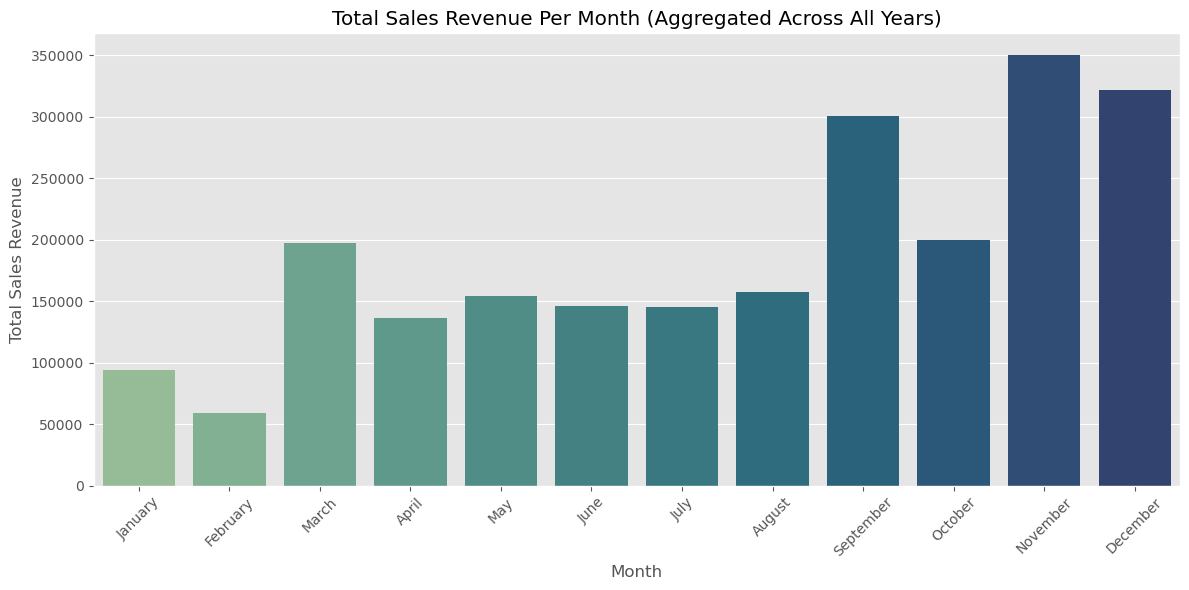

In [9]:
# Aggregate sales revenue by month (across all years)
df_monthly = df.groupby(pd.Grouper(key='Order Date', freq='M')).agg({'Sales Revenue': 'sum'})

# Extract month name and year from the index
df_monthly['Month Name'] = df_monthly.index.to_period('M').strftime('%B')
df_monthly['Year'] = df_monthly.index.to_period('M').strftime('%Y')

# Aggregate by month name (summing across years)
df_monthly_aggregated = df_monthly.groupby('Month Name').agg({'Sales Revenue': 'sum'}).reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
).reset_index()

# Plot total revenue per month
total_sales_per_month = plt.figure(figsize=(12, 6))
total_sales_per_month = sns.barplot(x='Month Name', y='Sales Revenue', data=df_monthly_aggregated, palette='crest')

# Formatting
total_sales_per_month = plt.xlabel('Month')
total_sales_per_month = plt.ylabel('Total Sales Revenue')
total_sales_per_month = plt.title('Total Sales Revenue Per Month (Aggregated Across All Years)')
total_sales_per_month = plt.xticks(rotation=45, fontsize=10)
total_sales_per_month = plt.tight_layout()  # Adjusts plot to fit into figure area

### When we analyze monthly sales revenue over time, the patterns in our sales become more apparent. We can now see that we do have  seasonality in our sales with a peak in sales revenue coming in November and December with a sharp dropoff in January and February. This is confirmed by the bar plot showing all sales over time by month.

### We also can see that, despite the seasonality, our sales overall are increasing over time at a growth rate of 22.62% over the last 5 years.

### Looking at the most recent years it appears that sales are growing at a faster rate so we will take a look at that next.

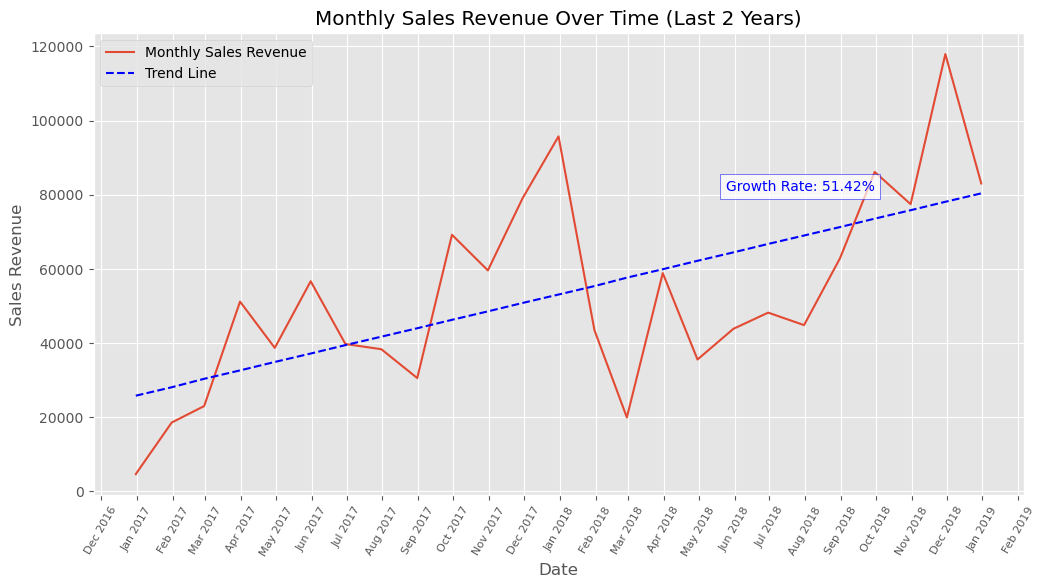

In [10]:
# Filter data for the last 2 years & aggregate by month
last_two_years = df[df['Order Date'] >= df['Order Date'].max() - pd.DateOffset(years=2)]
df_monthly_last_two_years = last_two_years.groupby(pd.Grouper(key='Order Date', freq='M')).agg({'Sales Revenue': 'sum'}).reset_index()

# Prepare data for trend line & fit linear regression model
X = np.arange(len(df_monthly_last_two_years)).reshape(-1, 1)  # Reshape for sklearn
y = df_monthly_last_two_years['Sales Revenue'].values
model = LinearRegression()
model.fit(X, y)
trend_line = model.predict(X)

# Plot 2 Year Sales Revenue Over Time & Trend Line
monthly_sales_over_2_years = plt.figure(figsize=(12, 6))
monthly_sales_over_2_years = sns.lineplot(x='Order Date',
                                          y='Sales Revenue',
                                          data=df_monthly_last_two_years,
                                          label='Monthly Sales Revenue')
monthly_sales_over_2_years = plt.plot(df_monthly_last_two_years['Order Date'],
                                      trend_line,
                                      color='blue',
                                      linestyle='--',
                                      label='Trend Line')

# Calculate growth rate from the trend line
slope = model.coef_[0]  # Slope of the trend line
start_date = df_monthly_last_two_years['Order Date'].min()
end_date = df_monthly_last_two_years['Order Date'].max()
time_period = (end_date - start_date).days / 365  # Convert days to years
growth_rate = slope * 12 / df_monthly_last_two_years['Sales Revenue'].mean() * 100  # Annual growth rate in percentage

# Add growth rate label on the trend line
monthly_sales_over_2_years = plt.text(x=df_monthly_last_two_years['Order Date'].iloc[-1] - pd.DateOffset(months=3),  # Adjust x-coordinate
         y=trend_line[-1],
         s=f'Growth Rate: {growth_rate:.2f}%',
         color='blue',
         ha='right',  # Horizontal alignment
         va='bottom',  # Vertical alignment
         fontsize=10,  # Font size
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='blue'))  # Background color and border

# Formatting
monthly_sales_over_2_years = plt.xlabel('Date')
monthly_sales_over_2_years = plt.ylabel('Sales Revenue')
monthly_sales_over_2_years = plt.title('Monthly Sales Revenue Over Time (Last 2 Years)')
monthly_sales_over_2_years = plt.xticks(rotation=60, fontsize=8)
monthly_sales_over_2_years = plt.legend()
monthly_sales_over_2_years = plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
monthly_sales_over_2_years = plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

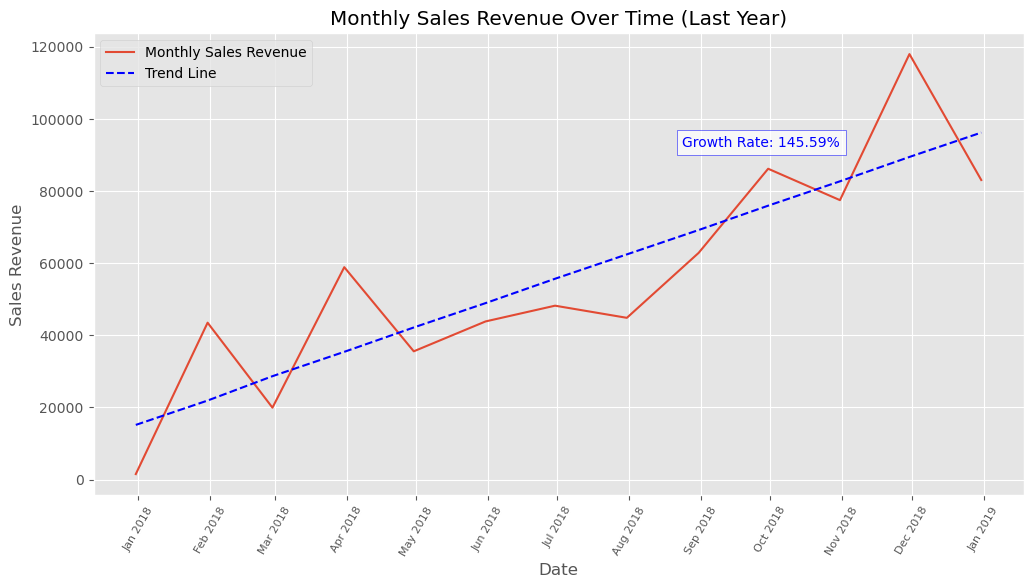

In [11]:
# Filter data for the last year & aggregate data by month
last_year = df[df['Order Date'] >= df['Order Date'].max() - pd.DateOffset(years=1)]
df_monthly_last_year = last_year.groupby(pd.Grouper(key='Order Date', freq='M')).agg({'Sales Revenue': 'sum'}).reset_index()

# Prepare data for trend line & fit linear regression model
X = np.arange(len(df_monthly_last_year)).reshape(-1, 1)  # Reshape for sklearn
y = df_monthly_last_year['Sales Revenue'].values
model = LinearRegression()
model.fit(X, y)
trend_line = model.predict(X)

# Plot Sales Revenue Over Time & trend line
monthly_sales_last_year = plt.figure(figsize=(12, 6))
monthly_sales_last_year = sns.lineplot(x='Order Date',
                                       y='Sales Revenue',
                                       data=df_monthly_last_year,
                                       label='Monthly Sales Revenue')
monthly_sales_last_year = plt.plot(df_monthly_last_year['Order Date'],
                                   trend_line,
                                   color='blue',
                                   linestyle='--',
                                   label='Trend Line')

# Calculate growth rate from the trend line
slope = model.coef_[0]  # Slope of the trend line
start_date = df_monthly_last_year['Order Date'].min()
end_date = df_monthly_last_year['Order Date'].max()
time_period = (end_date - start_date).days / 365  # Convert days to years
growth_rate = slope * 12 / df_monthly_last_year['Sales Revenue'].mean() * 100  # Annual growth rate in percentage

# Add growth rate label on the trend line
monthly_sales_last_year = plt.text(x=df_monthly_last_year['Order Date'].iloc[-1] - pd.DateOffset(months=2),  # Adjust x-coordinate
         y=trend_line[-1] * .95,  # Adjust y-coordinate
         s=f'Growth Rate: {growth_rate:.2f}%',
         color='blue',
         ha='right',  # Horizontal alignment
         va='bottom',  # Vertical alignment
         fontsize=10,  # Font size
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='blue'))  # Background color and border

# Formatting
monthly_sales_last_year = plt.xlabel('Date')
monthly_sales_last_year = plt.ylabel('Sales Revenue')
monthly_sales_last_year = plt.title('Monthly Sales Revenue Over Time (Last Year)')
monthly_sales_last_year = plt.xticks(rotation=60, fontsize=8)
monthly_sales_last_year = plt.legend()
monthly_sales_last_year = plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
monthly_sales_last_year = plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

### Here we see that sales revenue has indeed grown faster over the last 2 years, with a growth rate of 51.42%.

### The second plot shows sales revenue and growth over the last year. It should be noted however that as we have sales seasonality on an annual basis, the growth rate of 145.59% can be misleading as it cannot factor in the continued drop in sales we will surely see in February.

------------------------------------------------------------------------------------------------------------------

# 2. Customer Analysis
    - Customer Segmentation: Analyze sales by different segments to understand which segments contribute the most to revenue. 
    - Top Customers: Identify and analyze the top customers by revenue, orders, and RFM.

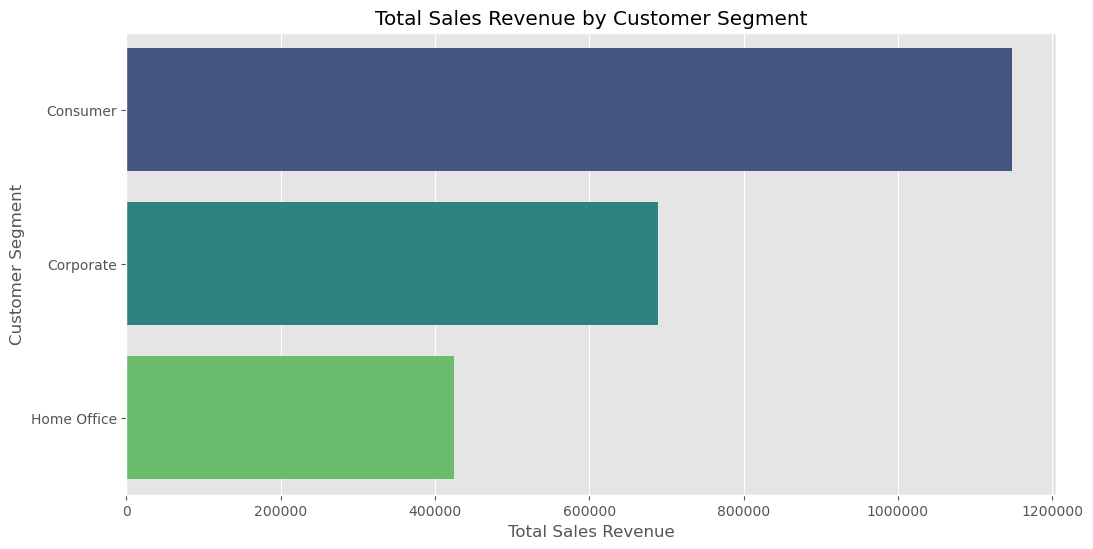

In [12]:
# Group, aggregate, and sort by Sales Revenue
segment_revenue = df.groupby('Segment')['Sales Revenue'].sum().reset_index()
segment_revenue = segment_revenue.sort_values(by='Sales Revenue', ascending=False)

# Plot aggregated Sales Revenue grouped by Segment
segment_rev_plot = plt.figure(figsize=(12, 6))
segment_rev_plot = sns.barplot(x='Sales Revenue', y='Segment', data=segment_revenue, palette='viridis')
segment_rev_plot = plt.xlabel('Total Sales Revenue')
segment_rev_plot = plt.ylabel('Customer Segment')
segment_rev_plot = plt.title('Total Sales Revenue by Customer Segment')
segment_rev_plot = plt.ticklabel_format(style='plain', axis='x')

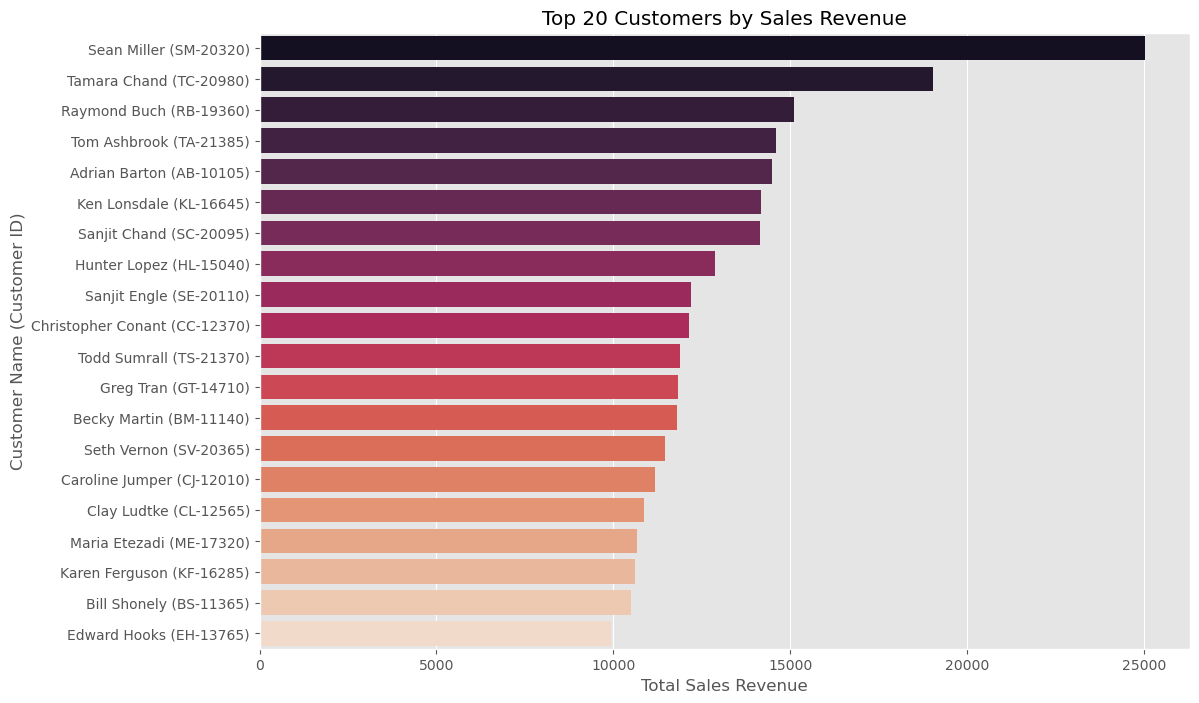

In [13]:
# Group by 'Customer Name' and 'Customer ID' and calculate the sum of 'Sales Revenue' for each customer
customer_revenue = df.groupby(['Customer Name', 'Customer ID'])['Sales Revenue'].sum().reset_index()

# Sort customers by total revenue and select top customers
top_customers_s = customer_revenue.sort_values(by='Sales Revenue', ascending=False).head(20)

# Combine 'Customer Name' and 'Customer ID' for labeling in the plot
top_customers_s['Customer Info'] = top_customers_s['Customer Name'] + ' (' + top_customers_s['Customer ID'].astype(str) + ')'

top_customers_sales = plt.figure(figsize=(12, 8))
top_customers_sales = sns.barplot(x='Sales Revenue', y='Customer Info', data=top_customers_s, palette='rocket')
top_customers_sales = plt.xlabel('Total Sales Revenue')
top_customers_sales = plt.ylabel('Customer Name (Customer ID)')
top_customers_sales = plt.title('Top 20 Customers by Sales Revenue')

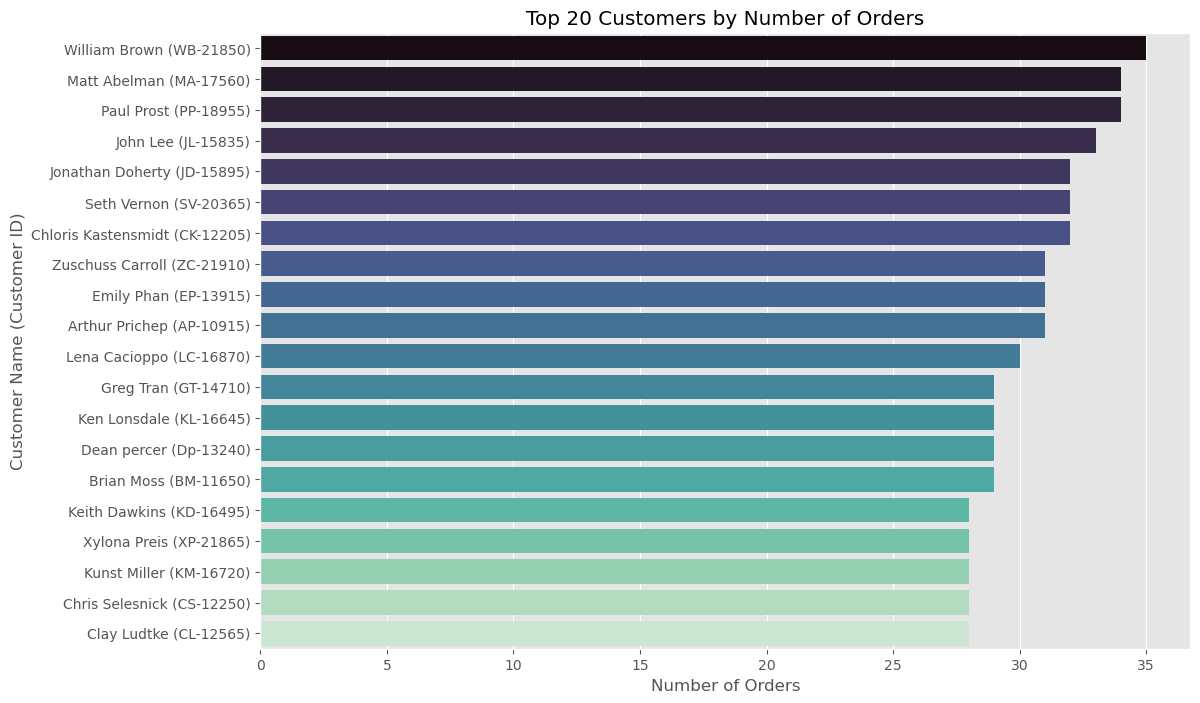

In [14]:
# Group by 'Customer Name' and 'Customer ID' and count the number of orders for each customer
customer_orders = df.groupby(['Customer Name', 'Customer ID'])['Order ID'].count().reset_index()
customer_orders.rename(columns={'Order ID': 'Number of Orders'}, inplace=True)

# Sort customers by number of orders and select top customers
top_customers_o = customer_orders.sort_values(by='Number of Orders', ascending=False).head(20)

# Combine 'Customer Name' and 'Customer ID' for labeling in the plot
top_customers_o['Customer Info'] = top_customers_o['Customer Name'] + ' (' + top_customers_o['Customer ID'].astype(str) + ')'

# Plot the top customers by number of orders
top_customers_orders = plt.figure(figsize=(12, 8))
top_customers_orders = sns.barplot(x='Number of Orders', y='Customer Info', data=top_customers_o, palette='mako')
top_customers_orders = plt.xlabel('Number of Orders')
top_customers_orders = plt.ylabel('Customer Name (Customer ID)')
top_customers_orders = plt.title('Top 20 Customers by Number of Orders')

In [15]:
# Calculate RFM values

# Define the snapshot date as the most recent date in your dataset
snapshot_date = df['Order Date'].max() + pd.DateOffset(days=1)

# Calculate Recency, Frequency and Monetary value for each customer
rfm_df = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,
    'Order ID': 'count',
    'Sales Revenue': 'sum'})

# Rename the columns
rfm_df.rename(columns={'Order Date': 'Recency', 'Order ID': 'Frequency', 'Sales Revenue': 'MonetaryValue'}, inplace=True)
rfm_df.head()

,Recency,Frequency,MonetaryValue
Customer ID,,,
AA-10315,185,11,5563.56
AA-10375,20,15,1056.39
AA-10480,260,12,1790.51
AA-10645,56,18,5086.93
AB-10015,416,6,886.15


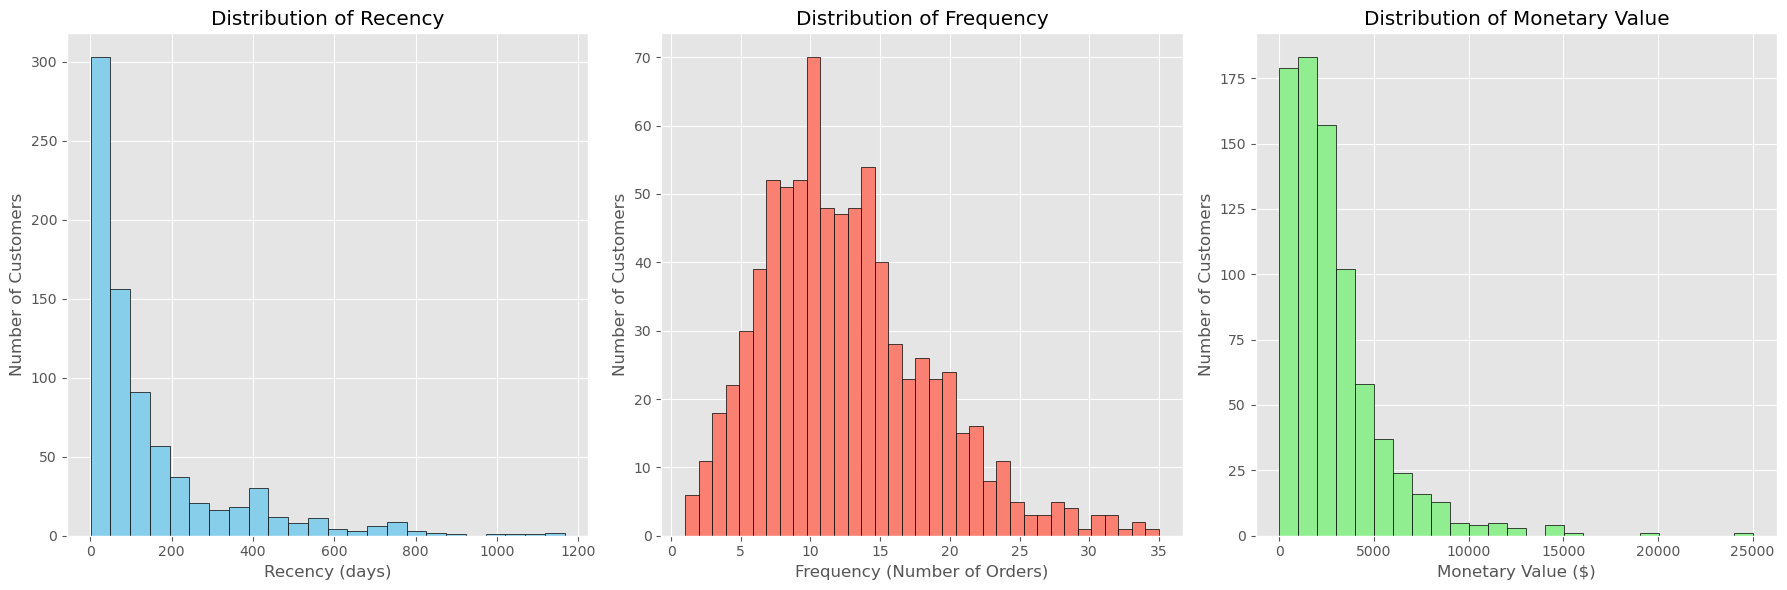

In [16]:
# Plot histograms of Recency, Frequency, and Monetary Value

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(rfm_df['Recency'], bins=24, color='skyblue', edgecolor='black')
plt.title('Distribution of Recency')
plt.xlabel('Recency (days)')
plt.ylabel('Number of Customers')

plt.subplot(1, 3, 2)
plt.hist(rfm_df['Frequency'], bins=35, color='salmon', edgecolor='black')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency (Number of Orders)')
plt.ylabel('Number of Customers')

plt.subplot(1, 3, 3)
plt.hist(rfm_df['MonetaryValue'], bins=25, color='lightgreen', edgecolor='black')
plt.title('Distribution of Monetary Value')
plt.xlabel('Monetary Value ($)')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

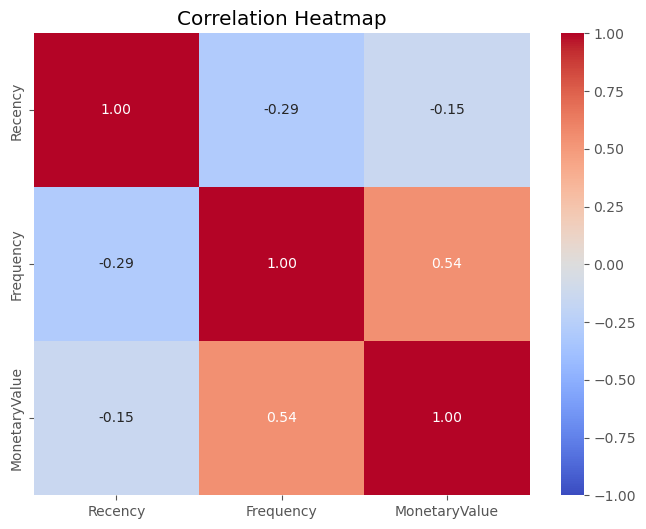

In [17]:
# Plot a heatmap to visualize correlations between Recency, Frequency, and Monetary Value.
rfm_corr = rfm_df[['Recency', 'Frequency', 'MonetaryValue']].corr()
rfm_heatmap = plt.figure(figsize=(8, 6))
rfm_heatmap = sns.heatmap(rfm_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
rfm_heatmap = plt.title('Correlation Heatmap')

### Here we can see that the consumer segment clearly brings in the most revenue, with home office accounting for the least revenue.

### We've also identified our top 20 customers by revenue and top 20 customers by total orders. This is great to know as our power users are also the most likely to refer so we could target them with referral bonuses or discounts to further increase revenue. We could even drill down further into this to see what products they purchase or where they are located, but for now we will continue on.

### Next we calculated the Recency, Frequency, and Monetary Value (RFM) of our customers. We can see that we have a right skew distribution for all 3 metrics with most customers most recent order coming within the last 50 days, 10 being the most common number or orders a customer makes, with most being between 7-14 orders, and the majority of customers monetary value being $3,000 or less. We also see a moderate correlation between Monetary Value and Frequency.

------------------------------------------------------------------------------------------------------------------

# 3. Geographical Analysis
    - Regional Sales Performance: Analyze sales by different regions, states, and cities to identify high and low-performing areas.

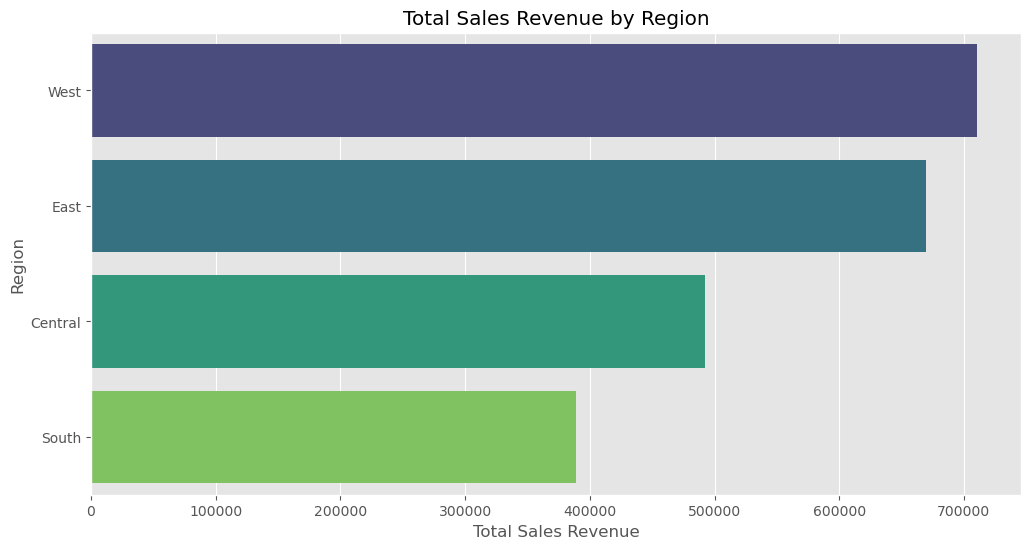

In [18]:
# Group by 'Region' and calculate the sum of 'Sales Revenue' for each region
region_revenue = df.groupby('Region')['Sales Revenue'].sum().reset_index()

# Sort regions by total revenue
region_revenue = region_revenue.sort_values(by='Sales Revenue', ascending=False)

# Plot the revenue by region
reg_rev_plot = plt.figure(figsize=(12, 6))
reg_rev_plot = sns.barplot(x='Sales Revenue', y='Region', data=region_revenue, palette='viridis')
reg_rev_plot = plt.xlabel('Total Sales Revenue')
reg_rev_plot = plt.ylabel('Region')
reg_rev_plot = plt.title('Total Sales Revenue by Region')

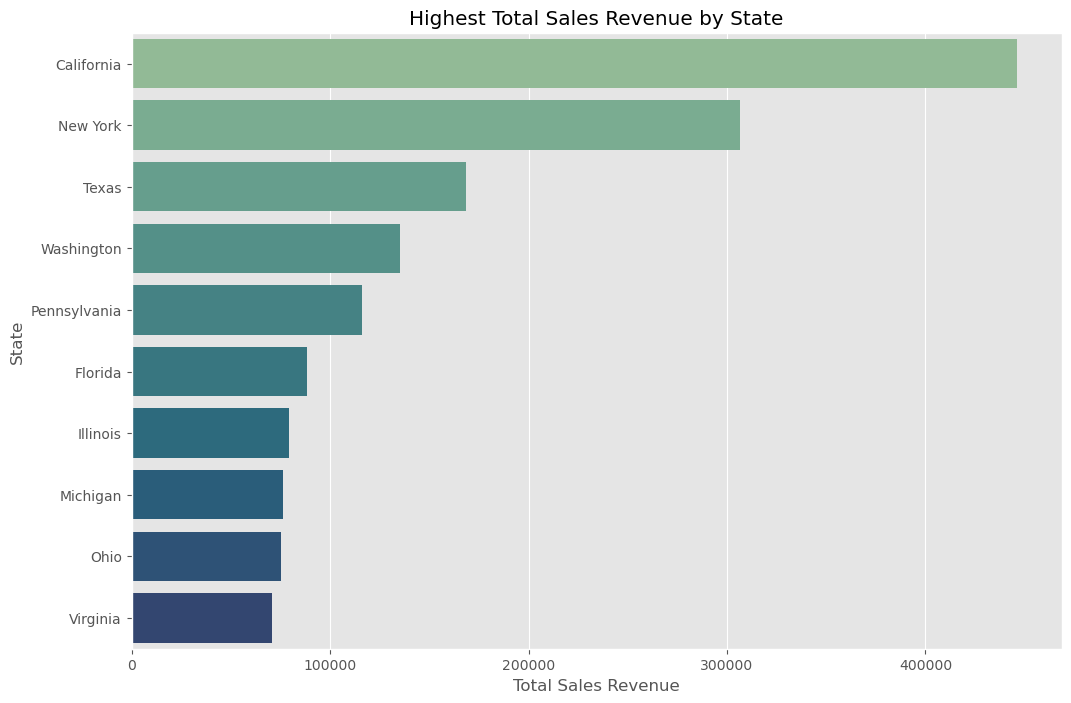

In [19]:
# Group by 'State' and calculate the sum of 'Sales Revenue' for each state
state_revenue = df.groupby('State')['Sales Revenue'].sum().reset_index()

# Sort states by total revenue
state_revenue_high = state_revenue.sort_values(by='Sales Revenue', ascending=False).head(10)

# Plot the highest revenue by state
state_rev_high_plot = plt.figure(figsize=(12, 8))
state_rev_high_plot = sns.barplot(x='Sales Revenue', y='State', data=state_revenue_high, palette='crest')
state_rev_high_plot = plt.xlabel('Total Sales Revenue')
state_rev_high_plot = plt.ylabel('State')
state_rev_high_plot = plt.title('Highest Total Sales Revenue by State')

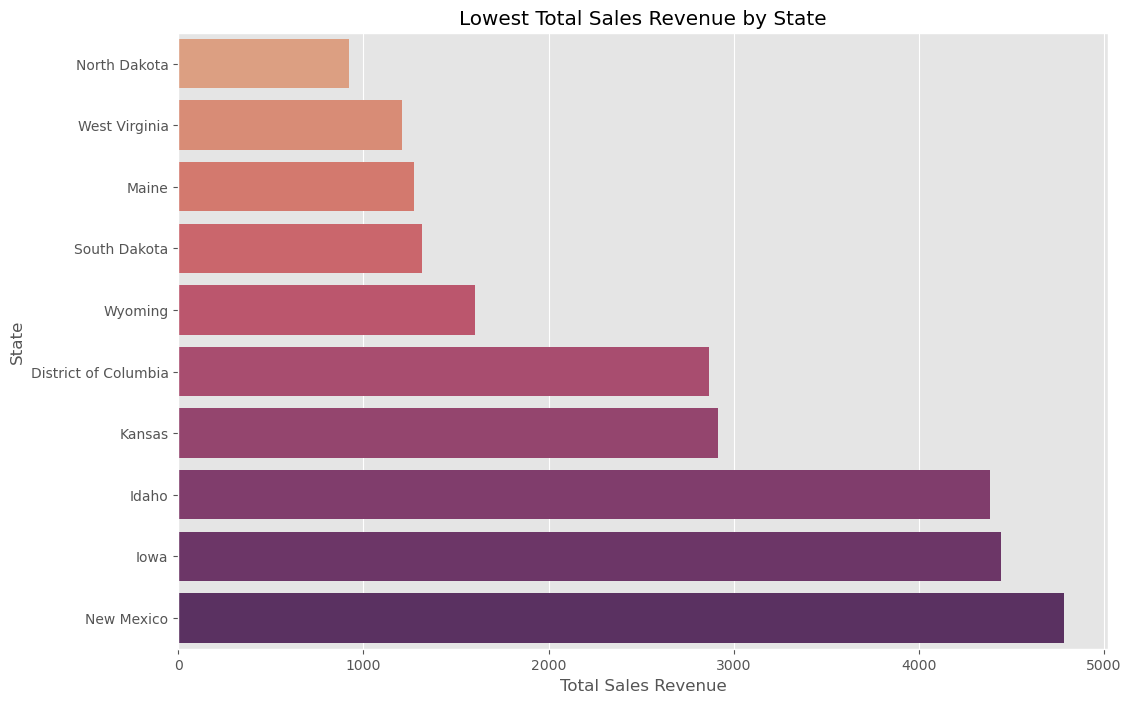

In [20]:
# Sort states by lowest total revenue
state_revenue_low = state_revenue.sort_values(by='Sales Revenue', ascending=True).head(10)

# Plot the lowest revenue by state
state_rev_low_plot = plt.figure(figsize=(12, 8))
state_rev_low_plot = sns.barplot(x='Sales Revenue', y='State', data=state_revenue_low, palette='flare')
state_rev_low_plot = plt.xlabel('Total Sales Revenue')
state_rev_low_plot = plt.ylabel('State')
state_rev_low_plot = plt.title('Lowest Total Sales Revenue by State')

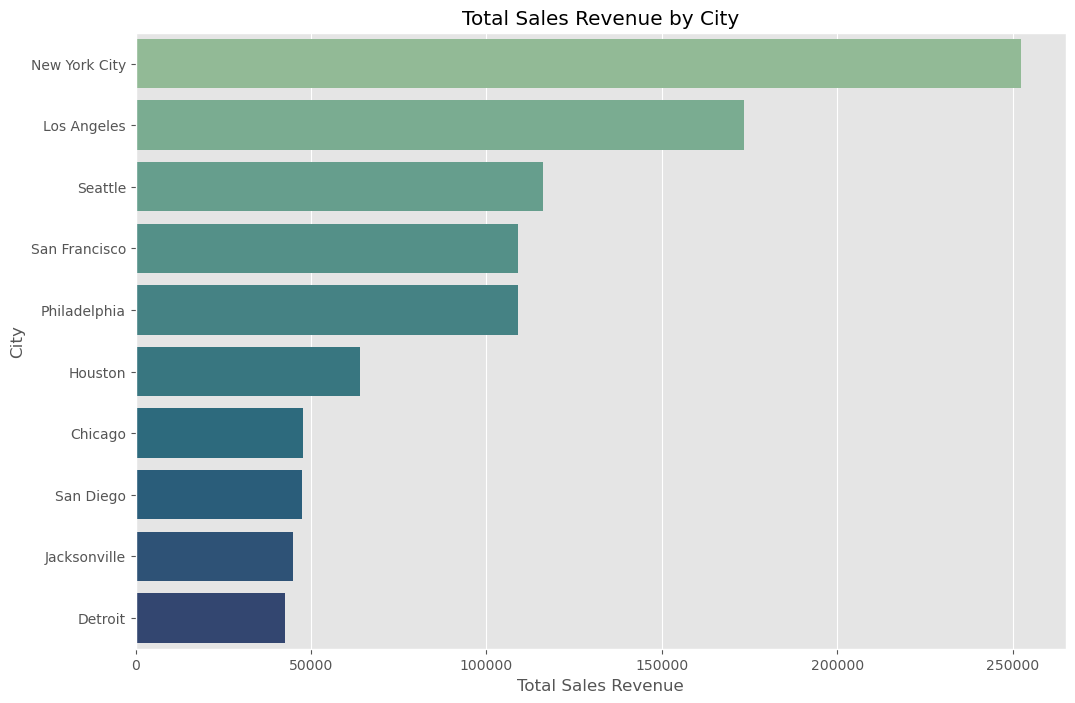

In [21]:
# Group by 'City' and calculate the sum of 'Sales Revenue' for each city
city_revenue = df.groupby('City')['Sales Revenue'].sum().reset_index()

# Sort cities by total revenue
city_revenue = city_revenue.sort_values(by='Sales Revenue', ascending=False).head(10)  # Show top 10 cities

# Plot the revenue by city
city_rev_plot = plt.figure(figsize=(12, 8))
city_rev_plot = sns.barplot(x='Sales Revenue', y='City', data=city_revenue, palette='crest')
city_rev_plot = plt.xlabel('Total Sales Revenue')
city_rev_plot = plt.ylabel('City')
city_rev_plot = plt.title('Total Sales Revenue by City')

### The West region narrowly edged out the East region as the region accounting for the most Total Revenue with Central and South regions accounting for the least Total Revenue.

### The three states with the highest total revenue were California, New York, and Texas, while the three states with the lowest revenue were North Dakota, West Virginia, and Maine.

### The three cities with the highest revenue were New York City, Los Angeles, and Seattle.

------------------------------------------------------------------------------------------------------------------

# 4. Product Analysis
    - Top Products and Categories: Identify the top-selling products, categories, and sub-categories.

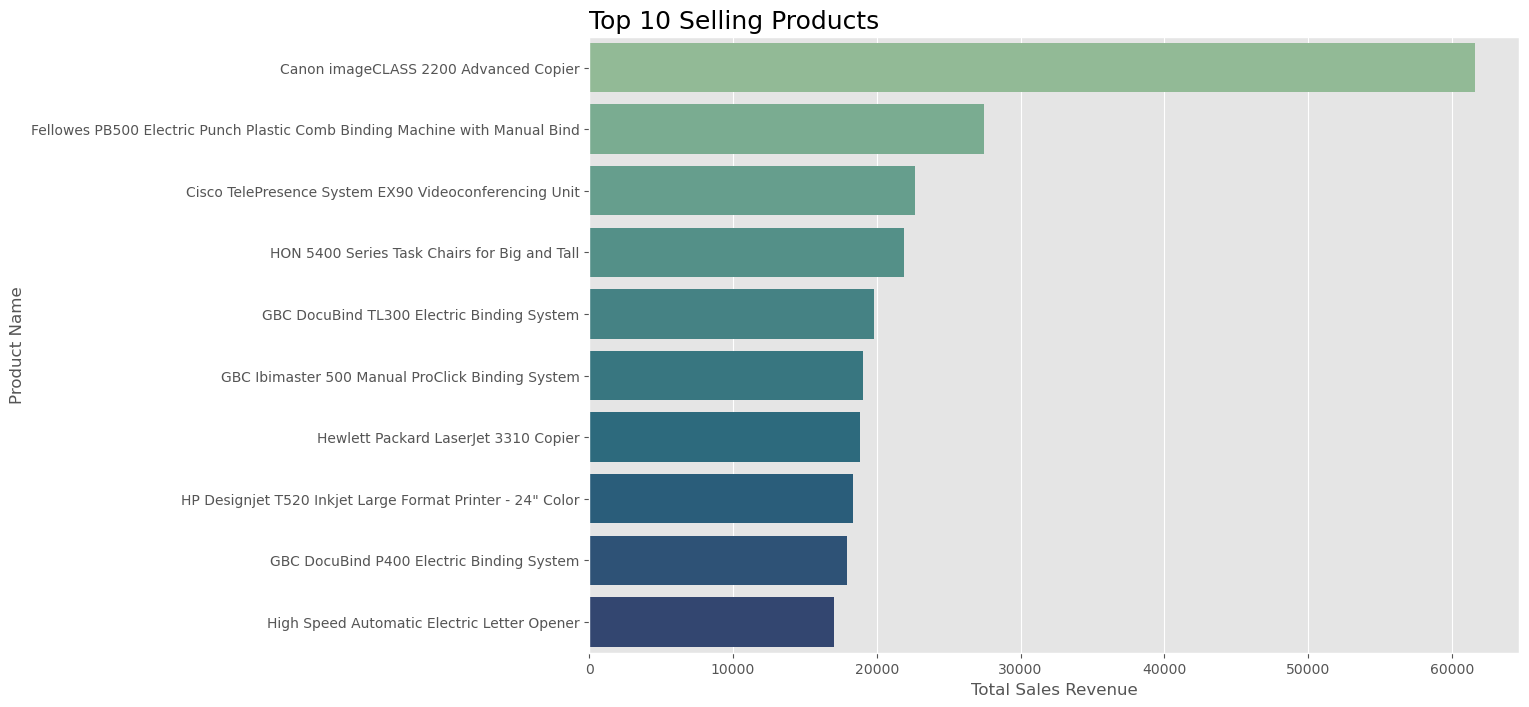

In [22]:
# Group by 'Product Name' and calculate the sum of 'Sales Revenue' for each product
top_products = df.groupby('Product Name')['Sales Revenue'].sum().reset_index()

# Sort products by total revenue and select top 10 products
top_products = top_products.sort_values(by='Sales Revenue', ascending=False).head(10)

# Plot the top products
top_product_bar = plt.figure(figsize=(12, 8))
top_product_bar = sns.barplot(x='Sales Revenue', y='Product Name', data=top_products, palette='crest')
top_product_bar = plt.xlabel('Total Sales Revenue')
top_product_bar = plt.ylabel('Product Name')
top_product_bar = plt.title('Top 10 Selling Products', loc='left', fontsize=18)

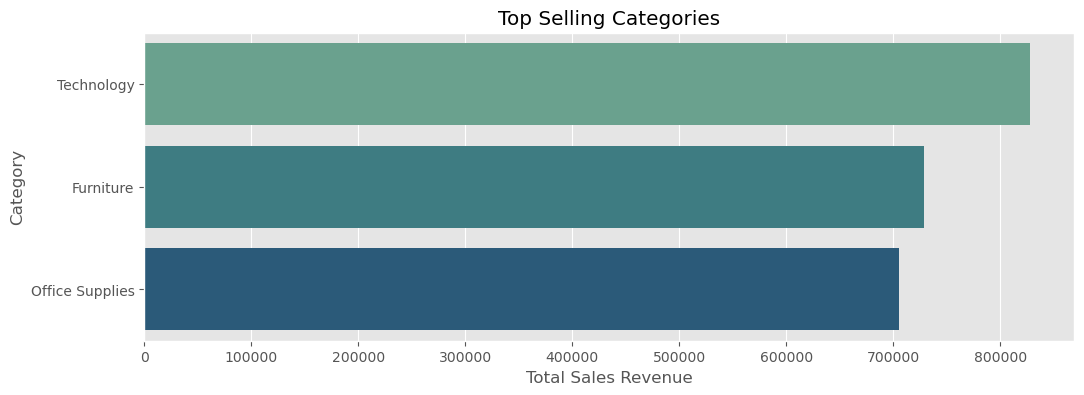

In [23]:
# Group by 'Category' and calculate the sum of 'Sales Revenue' for each category
top_categories = df.groupby('Category')['Sales Revenue'].sum().reset_index()

# Sort categories by total revenue and select top 10 categories
top_categories = top_categories.sort_values(by='Sales Revenue', ascending=False).head()

# Plot the top categories
top_cat_bar = plt.figure(figsize=(12, 4))
top_cat_bar = sns.barplot(x='Sales Revenue', y='Category', data=top_categories, palette='crest')
top_cat_bar = plt.xlabel('Total Sales Revenue')
top_cat_bar = plt.ylabel('Category')
top_cat_bar = plt.title('Top Selling Categories')

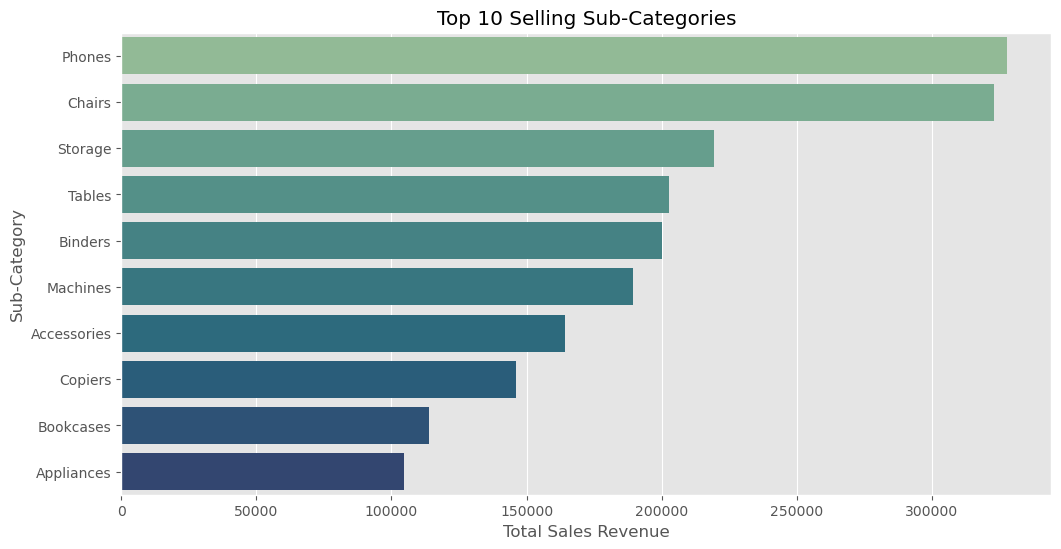

In [24]:
# Group by 'Sub-Category' and calculate the sum of 'Sales Revenue' for each sub-category
top_subcategories = df.groupby('Sub-Category')['Sales Revenue'].sum().reset_index()

# Sort sub-categories by total revenue and select top 10 sub-categories
top_subcategories = top_subcategories.sort_values(by='Sales Revenue', ascending=False).head(10)

# Plot the top sub-categories
top_sub_bar = plt.figure(figsize=(12, 6))
top_sub_bar = sns.barplot(x='Sales Revenue', y='Sub-Category', data=top_subcategories, palette='crest')
top_sub_bar = plt.xlabel('Total Sales Revenue')
top_sub_bar = plt.ylabel('Sub-Category')
top_sub_bar = plt.title('Top 10 Selling Sub-Categories')

### Our product analysis shows that the Canon imageCLASS 2200 Advanced Copier is by far our top selling product by sales revenue. On the whole, the technology category is our highest revenue source, and phones and chairs are the sub-categories that account for the highest share of total revenue.

------------------------------------------------------------------------------------------------------------------

# 5. Revenue Analysis
    - Sales Distribution: Investigate the distribution of sales revenue to see if it follows a particular distribution.
    - Outlier Detection: Identify any anomalies or outliers in sales data that may need further investigation.

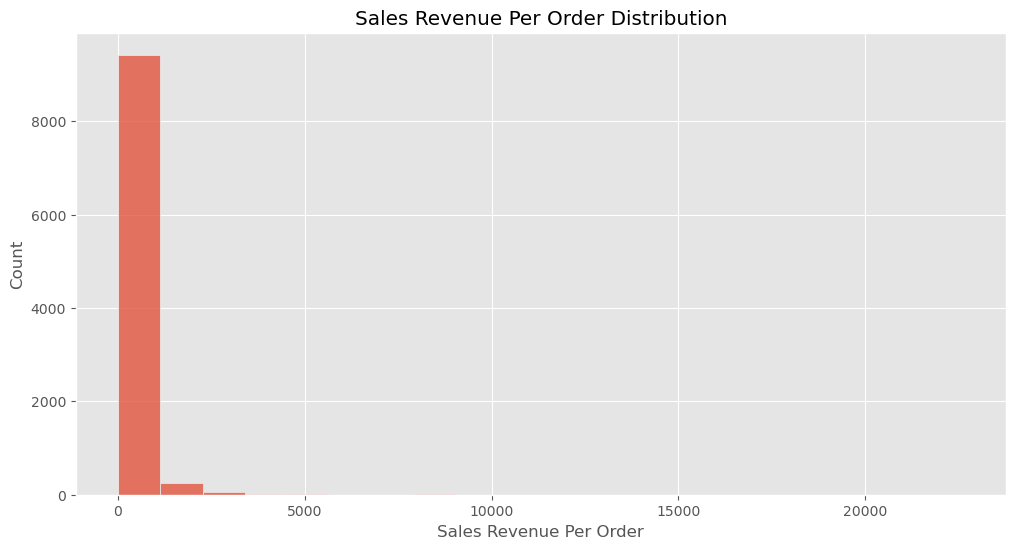

In [25]:
# Distribution of Sales Revenue Per Order
plt.figure(figsize=(12,6))
sales_hist = sns.histplot(x='Sales Revenue', data=df, bins=20)
sales_hist = plt.xlabel('Sales Revenue Per Order')
sales_hist = plt.ylabel('Count')
sales_hist = plt.title('Sales Revenue Per Order Distribution')

### We can clearly tell here that we have some outliers when it comes to Sales Revenue. We will dig further into this to see if this from an error in our data or if they are just large orders.

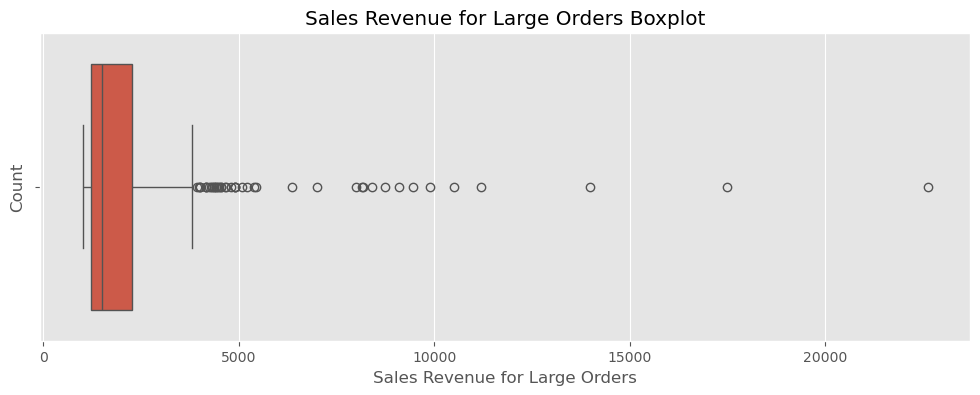

In [26]:
# Separate out Large Orders over $1,000
large_orders = df[df['Sales Revenue'] > 1000]

# Boxplot of Sales Revenue for Large Orders
plt.figure(figsize=(12,4))
large_sales_box = sns.boxplot(x='Sales Revenue', data=large_orders)
large_sales_box = plt.xlabel('Sales Revenue for Large Orders')
large_sales_box = plt.ylabel('Count')
large_sales_box = plt.title('Sales Revenue for Large Orders Boxplot')

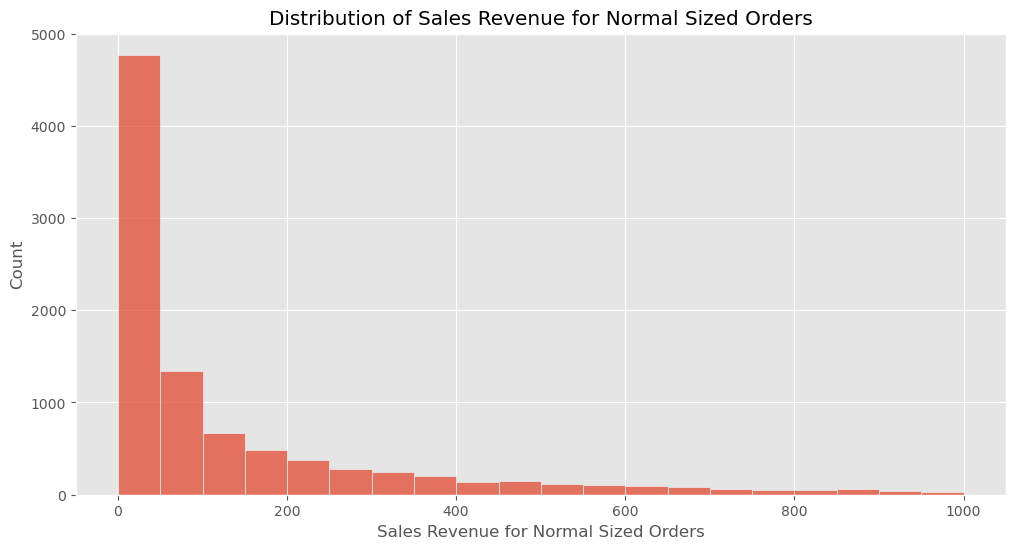

In [27]:
# Separate out most orders less than or equal to $1,000
most_orders = df[df['Sales Revenue'] <= 1000]

# Distribution of Sales Revenue Per Normal Order Size
plt.figure(figsize=(12,6))
normal_sales_hist = sns.histplot(x='Sales Revenue', data=most_orders, bins=20)
normal_sales_hist = plt.xlabel('Sales Revenue for Normal Sized Orders')
normal_sales_hist = plt.ylabel('Count')
normal_sales_hist = plt.title('Distribution of Sales Revenue for Normal Sized Orders')

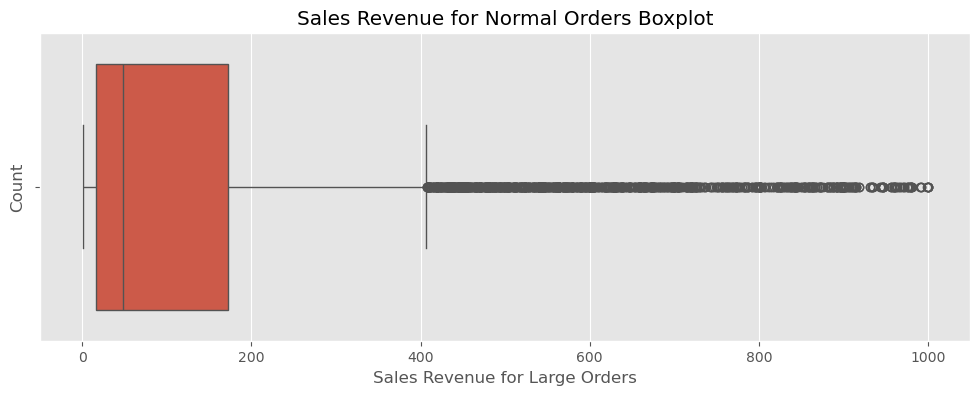

In [28]:
# Boxplot of Sales Revenue for Most Orders
plt.figure(figsize=(12,4))
normal_sales_box = sns.boxplot(x='Sales Revenue', data=most_orders)
normal_sales_box = plt.xlabel('Sales Revenue for Large Orders')
normal_sales_box = plt.ylabel('Count')
normal_sales_box = plt.title('Sales Revenue for Normal Orders Boxplot')

### When looking at only orders greater than 1,000 in sales revenue, the boxplot shows us that with as many outliers above 1.5 * the inner quartile range as we have, we just being a number of large orders in our data rather than there being some kind of error.

### When looking at orders of 1,000 in sales revenue or less, we can now more easily see that almost half of all orders are $50 or below in sales revenue.

------------------------------------------------------------------------------------------------------------------

# Conclusion

1) **Sales Trends and Patterns**
   - When we analyze monthly sales revenue over time, the patterns in our sales become more apparent. We can see that we do have  seasonality in our sales with a peak in sales revenue coming in November and December with a sharp dropoff in January and February. This is confirmed by the bar plot showing all sales over time by month.
   - We also can see that, despite the seasonality, our sales overall are increasing over time at a growth rate of 22.62% over the last 5 years. Looking at the most recent years, it appears that sales are growing at a faster rate of 51.42%.
  
     ## Insight 1) The fastest way to grow revenue would be to address our lowest sales months of January and February. To increase sales in these months without cannibalizing holiday sales, it would be beneficial to assess the sales volume left in customer's carts after the holidays and aggressively deploying email campaigns to push those customers over the finish line. We could also release new products in January to drive new sales.<br><br>
     
2) **Customer Analysis**
   - The consumer segment clearly brings in the most revenue, with home office accounting for the least revenue.
   - We've also identified our top 20 customers by revenue and top 20 customers by total orders. This is great to know as our power users are also the most likely to refer.
   - Next we calculated the Recency, Frequency, and Monetary Value (RFM) of our customers. We can see that we have a right skew distribution for all 3 metrics with most customers most recent order coming within the last 50 days, 10 being the most common number or orders a customer makes, with most being between 7-14 orders, and the majority of customers monetary value being $3,000 or less. We also see a moderate correlation between Monetary Value and Frequency.
  
     ## Insight 2) We can use targeted ad campaigns aimed at our top customers and offer them referral bonuses and exclusive discounts. To take it a step further to reward these customer's loyalty, we can explore a brand ambassador program to incentivize these customers to drive sales for us.<br><br>
     
3) **Geographical Analysis**
   - The West region narrowly edged out the East region as the region accounting for the most Total Revenue with Central and South regions accounting for the least Total Revenue.
   - The three states with the highest total revenue were California, New York, and Texas, while the three states with the lowest revenue were North Dakota, West Virginia, and Maine.
   - The three cities with the highest revenue were New York City, Los Angeles, and Seattle.
  
     ## Insight 3) In analyzing state and city data, we find that although New York produces the highest sales revenue of any city, California produces more sales revenue than the state of New York due to 3 California cities being in the top 10 of sales revenue. I would recommend deploying more marketing dollars in California and New York City only to maximize ROI of the increased ad spend.<br><br>
     
4) **Product Analysis**
   - Our product analysis shows that the Canon imageCLASS 2200 Advanced Copier is by far our top selling product by sales revenue.
   - On the whole, the technology category is our highest revenue source.
   - Phones and chairs are the sub-categories that account for the highest share of total revenue.

     ## Insight 4) Although the Technology segment does account for more sales revenue than the other categrories, it isn't by much. They are all within $150,000 of each other. I'd recommend we analyze our costs of goods sold per segment first and only then deploy additional resources toward the segment that has the highest profit margin.<br><br>
     
5) **Revenue Analysis**
   - When looking at only orders greater than 1,000 in sales revenue, the boxplot shows us that with as many outliers above 1.5 * the inner quartile range as we have, we just being a number of large orders in our data rather than there being some kind of error.
   - When looking at orders of 1,000 in sales revenue or less, we can now more easily see that almost half of all orders are $50 or below in sales revenue.

     ## Insight 5) The majority of our orders are smaller orders under $50. Depending on the direction the company wants to go in, we should either:
     a) Double down on this low revenue purchase behavior of our customers by carrying more products in this price range.<br><br>
     or<br><br>
     b) Assess the profit margins on our more expensive products and adjust pricing to increase total order size.